# Libraries importation

In [86]:
# libraries importation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline

# Data Loading

In [87]:
df = pd.read_excel('International_Breweries.xlsx')
df.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
2,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
3,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
4,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2108


# Data Exploration

In [88]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SALES_ID    1050 non-null   int64 
 1   SALES_REP   1050 non-null   object
 2   EMAILS      1050 non-null   object
 3   BRANDS      1050 non-null   object
 4   PLANT_COST  1050 non-null   int64 
 5   UNIT_PRICE  1050 non-null   int64 
 6   QUANTITY    1050 non-null   int64 
 7   COST        1050 non-null   int64 
 8   PROFIT      1050 non-null   int64 
 9   COUNTRIES   1050 non-null   object
 10  REGION      1050 non-null   object
 11  MONTHS      1043 non-null   object
 12  YEARS       1050 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 106.8+ KB


In [89]:
df.columns #the columns of the data

Index(['SALES_ID', 'SALES_REP', 'EMAILS', 'BRANDS', 'PLANT_COST', 'UNIT_PRICE',
       'QUANTITY', 'COST', 'PROFIT', 'COUNTRIES', 'REGION', 'MONTHS', 'YEARS'],
      dtype='object')

In [90]:
 df.shape # the number of the rows and the columns

(1050, 13)

In [91]:
df.describe() #summary statistics

,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,10623.640000,153.076190,271.809524,850.361905,230992.714286,100800.685714,2018.200952
std,302.789311,53.134037,133.410788,87.151602,115629.308027,77563.068538,4.876609
min,10101.000000,80.000000,150.000000,700.000000,105300.000000,35000.000000,2017.000000
25%,10361.250000,90.000000,150.000000,776.000000,141412.500000,46860.000000,2017.000000
50%,10623.500000,150.000000,200.000000,852.000000,184325.000000,58020.000000,2018.000000
75%,10885.750000,180.000000,450.000000,927.000000,351675.000000,191025.000000,2019.000000
max,11147.000000,250.000000,500.000000,1000.000000,499500.000000,269190.000000,2109.000000


In [92]:
df.isnull().sum() # null value

SALES_ID      0
SALES_REP     0
EMAILS        0
BRANDS        0
PLANT_COST    0
UNIT_PRICE    0
QUANTITY      0
COST          0
PROFIT        0
COUNTRIES     0
REGION        0
MONTHS        7
YEARS         0
dtype: int64

Only 7 rows have missing value in the "MONTHS" column

In [93]:
df.duplicated().sum()

3

3 duplicate values in the data

# Data Cleaning

In [94]:
df.dropna(subset=['MONTHS'], inplace=True) # Drop the null value
df.isnull().sum()

SALES_ID      0
SALES_REP     0
EMAILS        0
BRANDS        0
PLANT_COST    0
UNIT_PRICE    0
QUANTITY      0
COST          0
PROFIT        0
COUNTRIES     0
REGION        0
MONTHS        0
YEARS         0
dtype: int64

The missing values in the "MONTHS" column are not critical to the analysis and the number of missing values is small compared to the total number of rows in your dataset, so I considered dropping the rows with missing "MONTHS" values.

In [95]:
df.drop_duplicates(inplace=True) # Drop duplicate rows
df.duplicated().sum()

0

Considered the 3 duplicate values to ensure data integrity, consistency, and prevent bias in analysis, while also potentially improving computational efficiency.

# Data Visuliaztion

## 1. Histograms of Numeric Columns:

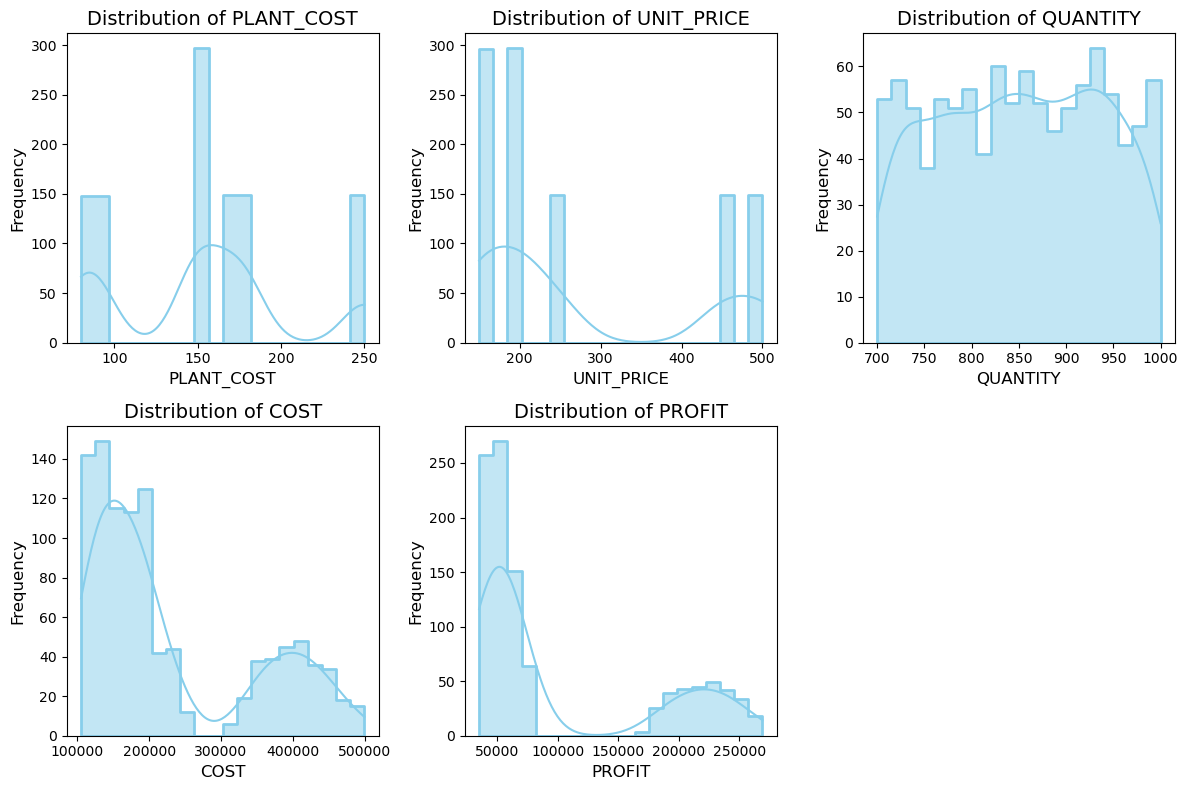

In [96]:
# Create histograms for numeric columns with aesthetic styling
numeric_columns = ['PLANT_COST', 'UNIT_PRICE', 'QUANTITY', 'COST', 'PROFIT']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, color='skyblue', kde=True, element='step', linewidth=2)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


**Distribution of plant cost:** The graph shows that the most common plant costs are between 100 dollars and 200 dollars. There are fewer plants that cost more than 200 dollars or less than 100 dollars. This suggests that there is a strong demand for plants in the 100-200 dollars price range.

**Distribution of unit price:** The graph shows that the most common unit prices are less than 300 dollars. There are fewer products that cost more than 300 dollars. This suggests that there is a strong demand for products in that are less than 300 dollars price range.

**Distribution of quantity:** The graph shows that the most common quantity is between 900 and 950. 

**Distribution of cost:** The graph shows that the most common cost is between 100000 to 200000 dollars.

**Distribution of profit:** he graph shows that the most common profit is less than 100000 dollars.

## 2. Bar Charts for Categorical Columns with Aesthetic Styling:

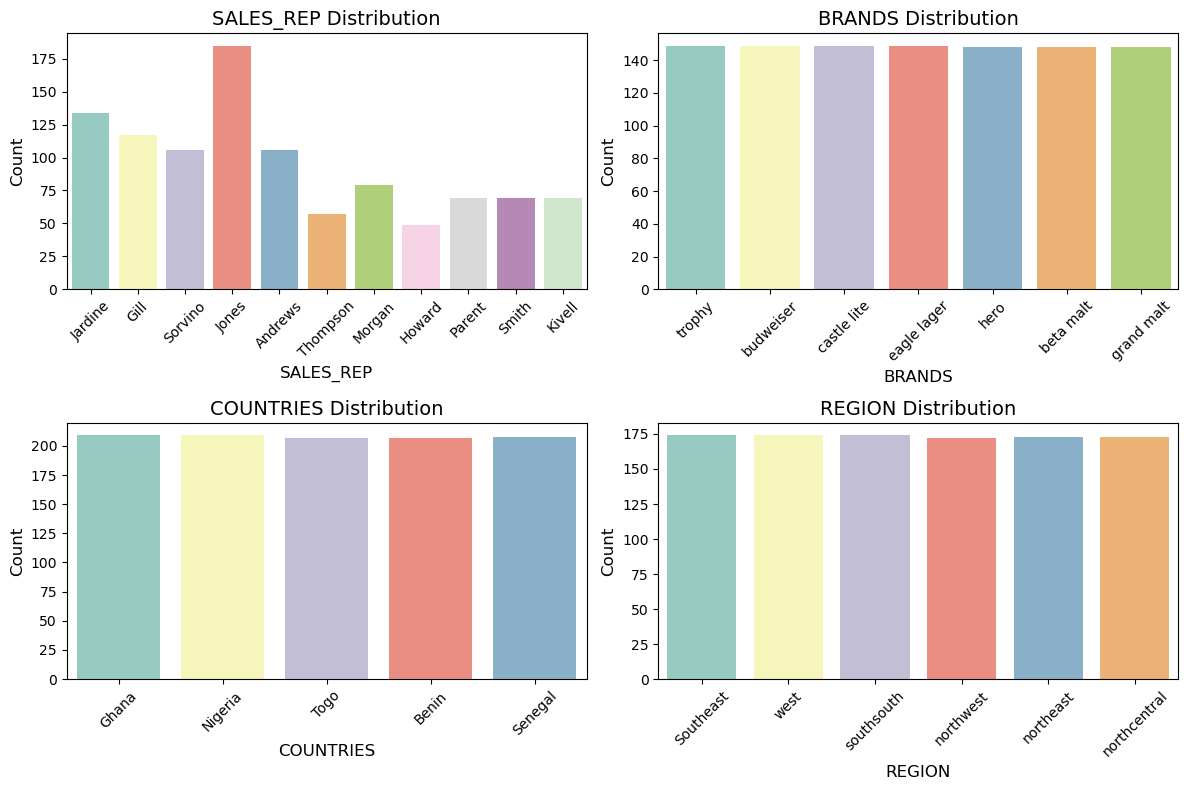

In [97]:
# Create bar charts for categorical columns with aesthetic styling
categorical_columns = ['SALES_REP', 'BRANDS', 'COUNTRIES', 'REGION']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='Set3')
    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


From the graphs **SALES_REP Distributions**, it can be seen that 'Jones' has the highest count follows by 'jardines'. The other graphs **BRANDS Distributions, COUNTRIES Distributions and REGION Distributions are evenly distributed**

## 3. Time Series Analysis (Monthly Sales) with Aesthetic Styling

The month with the minimum mean profit is April, and the mean profit is 99287.55813953489
The month with the maximum mean profit is March, and the mean profit is 103545.63218390805


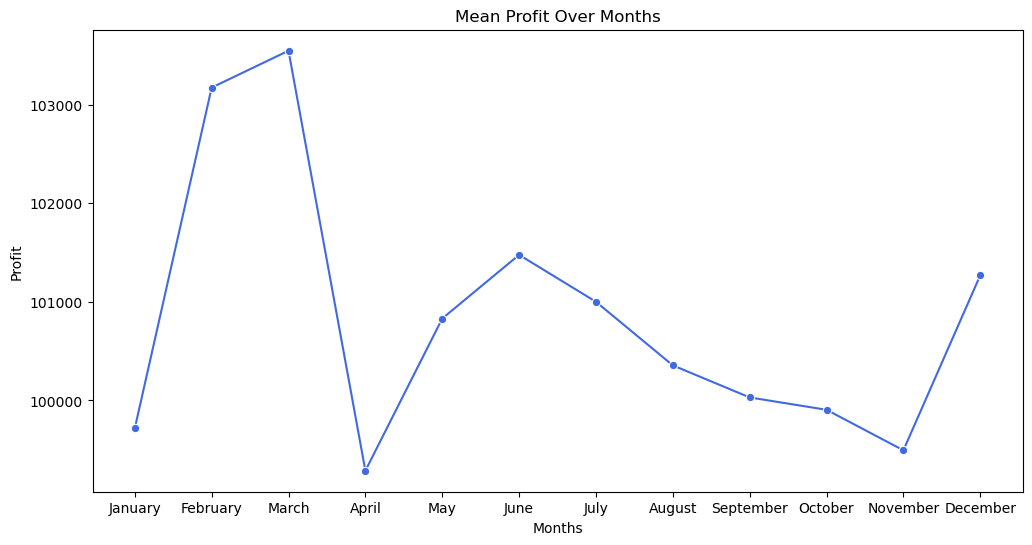

In [99]:
# Calculate the mean profit for each month
mean_profit_by_month = df.groupby('MONTHS')['PROFIT'].mean()

# Find the month with the minimum and maximum mean profit
min_month = mean_profit_by_month.idxmin()
max_month = mean_profit_by_month.idxmax()

# Find the minimum and maximum mean profit values
min_mean_profit = mean_profit_by_month.min()
max_mean_profit = mean_profit_by_month.max()

# Print the statements with the corresponding months
print(f"The month with the minimum mean profit is {min_month}, and the mean profit is {min_mean_profit}")
print(f"The month with the maximum mean profit is {max_month}, and the mean profit is {max_mean_profit}")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='MONTHS', y='PROFIT', estimator='mean', err_style=None, color='royalblue', marker='o')
plt.xlabel("Months")
plt.ylabel("Profit")
plt.title("Mean Profit Over Months")
plt.show()


The graph shows the mean profit over months. The month with the minimum mean profit is April, and the mean profit is 99287.55The month with the maximum mean profit is March, and the mean profit is 103545.63.

The graph shows that the mean profit is highest in March and gradually decreases until April, where it reaches its lowest point. After April, the mean profit starts to increase again.

## 4. Time Series Analysis (Years Sales) with Aesthetic Styling:

The year with the minimum total profit is 2107, and the sum profit is 43500
The year with the maximum total profit is 2017, and the sum profit is 38060210


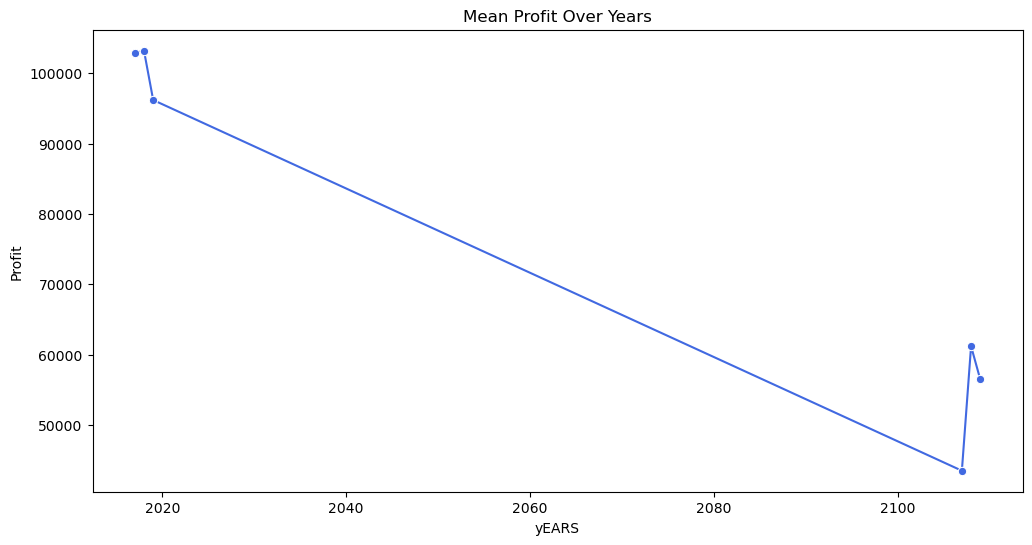

In [100]:
# Calculate the sum profit for each year
sum_profit_by_year = df.groupby('YEARS')['PROFIT'].sum()

# Find the year with the minimum and maximum sum profit
min_year = sum_profit_by_year.idxmin()
max_year = sum_profit_by_year.idxmax()

# Find the minimum and maximum sum profit values
min_sum_profit = sum_profit_by_year.min()
max_sum_profit = sum_profit_by_year.max()

# Print the statements with the corresponding years
print(f"The year with the minimum total profit is {min_year}, and the sum profit is {min_sum_profit}")
print(f"The year with the maximum total profit is {max_year}, and the sum profit is {max_sum_profit}")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YEARS', y='PROFIT', estimator='mean', err_style=None, color='royalblue', marker='o')
plt.xlabel("yEARS")
plt.ylabel("Profit")
plt.title("Mean Profit Over Years")
plt.show()

The graph shows the total profit over years. The year with the minimum profit is 2107 with the total profit of 43500. The year with the maximum sum profit is 2017 with the total profit of 38060210.

The graph also shows that the total profit was highest in 2017 and gradually decreased until 2107, where it reached its lowest point. After 2107, the profit starts to increase again.

## 4. Scatter Plot (Relationship between UNIT_PRICE and PROFIT) with Aesthetic Styling

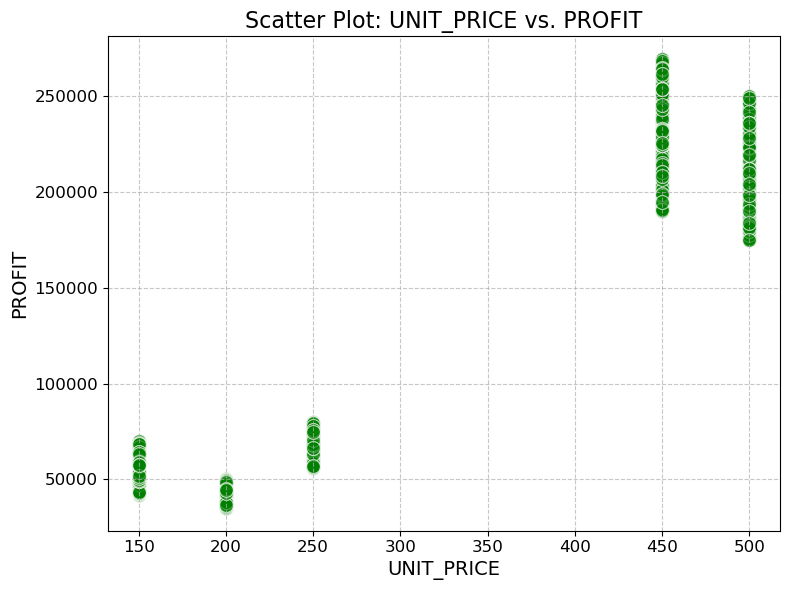

In [101]:
# Create a scatter plot for UNIT_PRICE vs. PROFIT with aesthetic styling
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='UNIT_PRICE', y='PROFIT', alpha=0.7, color='green', marker='o', s=100)
plt.title('Scatter Plot: UNIT_PRICE vs. PROFIT', fontsize=16)
plt.xlabel('UNIT_PRICE', fontsize=14)
plt.ylabel('PROFIT', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The graph shows that there is a positive correlation between unit price and profit. This means that, in general, products with a higher unit price tend to generate more profit. However, there is also a lot of variation in the data. Some products with a high unit price generate a lot of profit, while others generate relatively little profit. Conversely, some products with a low unit price generate a lot of profit, while others generate relatively little profit.

# Statistical analysis


In [102]:
import scipy.stats as stats


profit_data = df['PROFIT']

# Calculate mean
mean_profit = np.mean(profit_data)
print(f'Mean Profit: {mean_profit:.2f}')

# Calculate median
median_profit = np.median(profit_data)
print(f'Median Profit: {median_profit:.2f}')

# Calculate variance
variance_profit = np.var(profit_data)
print(f'Variance of Profit: {variance_profit:.2f}')

Mean Profit: 100843.62
Median Profit: 58090.00
Variance of Profit: 6011385987.31


The mean profit is approximately 100,843.62, representing the average profit value. The median profit, which is the middle value when all profits are sorted, is 58,090.00. The variance of profits, a measure of how spread out the data is, is approximately 6,011,385,987.31.

In [103]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'COUNTRIES' column and add it as a new column 'Country_Labels'
df['Country_Labels'] = label_encoder.fit_transform(df['COUNTRIES'])

# Perform ANOVA to compare profits among different countries
f_statistic, p_value = stats.f_oneway(*[df[df['Country_Labels'] == label]['PROFIT'] for label in df['Country_Labels'].unique()])

print(f'F-Statistic: {f_statistic:.2f}')
print(f'P-Value: {p_value:.4f}')

# Interpret the results of ANOVA
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in profits among countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in profits among countries.")

F-Statistic: 0.09
P-Value: 0.9868
Fail to reject the null hypothesis: There is no significant difference in profits among countries.


The F-Statistic of 0.09 represents the result of an analysis, such as an ANOVA, testing the difference in profits among different countries or groups. The associated P-Value of 0.9868 indicates the probability of observing such results by chance. In this case, with a high P-Value and the statement "Fail to reject the null hypothesis," it suggests that there is insufficient evidence to conclude a significant difference in profits among the countries or groups under consideration.

In [104]:
correlation_matrix = df.corr()  # Compute the correlation matrix
correlation_matrix

C:\Users\abdur\AppData\Local\Temp\ipykernel_18072\2018868651.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()  # Compute the correlation matrix


,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS,Country_Labels
SALES_ID,1.000000,-0.000526,0.000059,0.056294,0.009271,0.006310,0.009197,-0.000229
PLANT_COST,-0.000526,1.000000,0.879548,0.008891,0.857975,0.700331,0.007170,-0.001501
UNIT_PRICE,0.000059,0.879548,1.000000,-0.010818,0.974629,0.946721,-0.020745,-0.000144
QUANTITY,0.056294,0.008891,-0.010818,1.000000,0.190689,0.107735,-0.037739,0.021230
COST,0.009271,0.857975,0.974629,0.190689,1.000000,0.957468,-0.027355,0.003013
PROFIT,0.006310,0.700331,0.946721,0.107735,0.957468,1.000000,-0.037741,0.002217
YEARS,0.009197,0.007170,-0.020745,-0.037739,-0.027355,-0.037741,1.000000,-0.039052
Country_Labels,-0.000229,-0.001501,-0.000144,0.021230,0.003013,0.002217,-0.039052,1.000000


The provided table appears to be a correlation matrix showing the correlation coefficients between various attributes in a dataset. Each value in the table represents the correlation between two corresponding attributes.

For example, the correlation between "PLANT_COST" and "UNIT_PRICE" is approximately 0.88, indicating a strong positive relationship between these two variables. Similarly, the correlation between "UNIT_PRICE" and "COST" is approximately 0.97, suggesting a strong positive association.

However, the correlations between "YEARS" and most other attributes are relatively weak, with coefficients close to zero, indicating little to no linear relationship

In [105]:
country_counts = df['COUNTRIES'].value_counts()
country_counts

Ghana      209
Nigeria    209
Senegal    208
Togo       207
Benin      207
Name: COUNTRIES, dtype: int64

The provided value counts represent the distribution of data in the "COUNTRIES" column of a dataset. Each country label is followed by the corresponding count of occurrences in the dataset. 

In this dataset, "Ghana" and "Nigeria" appear the most frequently, with 209 occurrences each, followed by "Senegal" with 208 occurrences, and "Togo" and "Benin" with 207 occurrences each. These counts indicate how many times each country appears in the dataset and provide insights into the data's country distribution.

In [106]:
mean_profit_by_country = df.groupby('COUNTRIES')['PROFIT'].mean()
mean_profit_by_country

COUNTRIES
Benin       99821.642512
Ghana      100313.157895
Nigeria    102027.320574
Senegal    102918.413462
Togo        99121.207729
Name: PROFIT, dtype: float64

The "mean_profit_by_country" data provides the average profit values for each of the listed countries in the "COUNTRIES" column of a dataset.

On average, "Senegal" has the highest mean profit at approximately 102,918, followed closely by "Nigeria" with approximately 102,027. "Ghana" also has a relatively high mean profit of approximately 100,313, while "Benin" and "Togo" have slightly lower mean profits of approximately 99,822 and 99,121, respectively. These values offer insights into the average profitability across different countries in the dataset.

# Data preprocessing and feature engineering

In [107]:
df1 = df.copy() # make a copy of the data

In [108]:
#list of columns to drop 
columns_to_drop = ['SALES_ID', 'EMAILS', 'MONTHS']

# Drop the specified columns
df1 = df1.drop(columns=columns_to_drop)

In [109]:
# transform the categorical values to numerical
df1['SALES_REP'] = label_encoder.fit_transform(df1['SALES_REP'])
df1['BRANDS'] = label_encoder.fit_transform(df1['BRANDS'])
df1['COUNTRIES'] = label_encoder.fit_transform(df1['COUNTRIES'])
df1['REGION'] = label_encoder.fit_transform(df1['REGION'])

In [110]:
# Feature Engineering: create new features from the existing features

df1['Total_Cost'] = df1['PLANT_COST'] + df1['COST']  # Calculate total cost
df1['Total_Revenue'] = df1['UNIT_PRICE'] * df1['QUANTITY'] # Calculate total revenue

#Sales Revenue per Sales Representative
sales_rep_revenue = df1.groupby('SALES_REP')['Total_Revenue'].sum().reset_index()
sales_rep_revenue.rename(columns={'Total_Revenue': 'Sales_Rep_Revenue'}, inplace=True)
df1 = df1.merge(sales_rep_revenue, on='SALES_REP', how='left')

In [111]:
df1.columns

Index(['SALES_REP', 'BRANDS', 'PLANT_COST', 'UNIT_PRICE', 'QUANTITY', 'COST',
       'PROFIT', 'COUNTRIES', 'REGION', 'YEARS', 'Country_Labels',
       'Total_Cost', 'Total_Revenue', 'Sales_Rep_Revenue'],
      dtype='object')

In [112]:
from sklearn.model_selection import train_test_split
# Splitting Data (if needed)
X = df1.drop(columns=['PROFIT', 'Country_Labels'])  # Features
y = df1['PROFIT']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development and Evaluation

In [113]:
# Model Selection
model = LinearRegression()

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Squared Error: 5080570.70
Root Mean Squared Error: 2254.01
R-squared (R^2): 1.00


The metrics are commonly used for evaluating the performance of regression models:

1. **Mean Squared Error (MSE)**: It measures the average squared difference between predicted values and actual values. In this case, the MSE of approximately 5,080,570.70 suggests that, on average, the model's predictions deviate from the actual values by this amount when squared.

2. **Root Mean Squared Error (RMSE)**: This is the square root of the MSE. It provides a more interpretable measure of error, and in this context, the RMSE of approximately 2,254.01 indicates the typical magnitude of prediction errors in the same units as the target variable.

3. **R-squared (R^2)**: It is a measure of how well the model explains the variance in the data. An R-squared of 1.00 suggests that the model perfectly fits the data, explaining all of the variance, which is indicative of an ideal model fit.

Overall, these metrics suggest that the regression model being evaluated has a very high degree of accuracy, as indicated by the low MSE and RMSE values and the perfect R-squared score of 1.00.

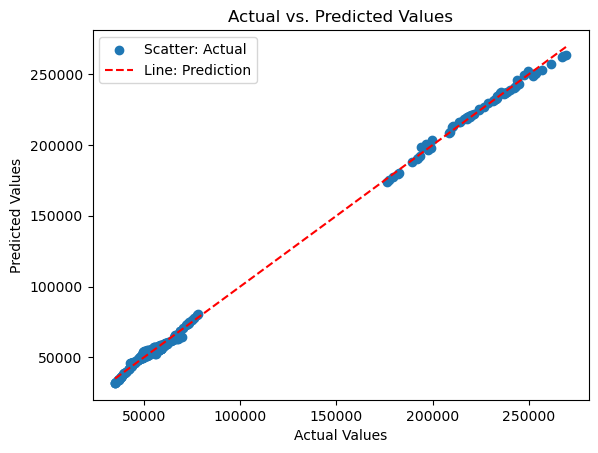

In [114]:
# Create a scatter plot
plt.scatter(y_test, y_pred, label='Scatter: Actual')

# Create a line plot for the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='Line: Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

The scatter plot indicates a positive correlation between the actual and predicted values, which suggests that the model used for prediction is performing reasonably well.

In [117]:
# Get the coefficients (feature importances) from the linear regression model
coefficients = model.coef_

# Match coefficients with feature names
feature_names = X_train.columns  # Assuming you have a DataFrame X_train with feature names

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by absolute coefficient values to identify the most important ones
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted feature importance
print(feature_importance)

              Feature  Coefficient  Absolute_Coefficient
2          PLANT_COST  -511.726748            511.726748
9          Total_Cost  -340.933923            340.933923
3          UNIT_PRICE   298.068712            298.068712
5                COST   170.792826            170.792826
10      Total_Revenue   170.792826            170.792826
4            QUANTITY   -59.997098             59.997098
1              BRANDS    44.497151             44.497151
0           SALES_REP   -30.755192             30.755192
7              REGION    30.618233             30.618233
8               YEARS    16.992643             16.992643
6           COUNTRIES    15.382832             15.382832
11  Sales_Rep_Revenue    -0.000007              0.000007


The table shows how different factors affect the predicted outcomes in a business scenario. When plant costs are high, profits tend to be lower, indicating a negative impact. On the other hand, higher unit prices and total costs are linked to increased profits, showing a positive influence. Other factors like brands, region, and years also play a role, although their impact is relatively smaller. Surprisingly, sales representative revenue has very little effect, suggesting it doesn't significantly influence the predictions.

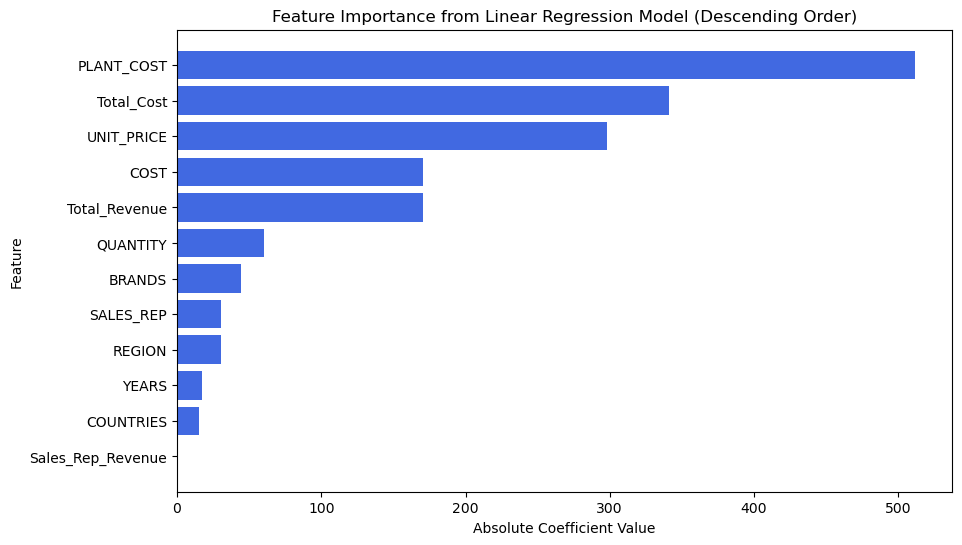

In [118]:
# Sort the feature_importance DataFrame by absolute coefficient values in descending order
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute_Coefficient'], color='royalblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression Model (Descending Order)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


The graph indicate how important the features are to the predictive model in descending order